In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import keras.backend as K

Using TensorFlow backend.


In [2]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.reuters.load_data()

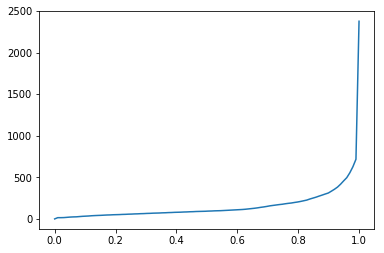

In [3]:
data_input_len_quantile_x = np.linspace(0, 1, num=100)
data_input_len_quantile_y = np.quantile(
    [len(x) for x in X_train] + [len(x) for x in X_test], data_input_len_quantile_x)
plt.plot(data_input_len_quantile_x, data_input_len_quantile_y)
plt.show()

In [4]:
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=256, padding='post', truncating='post')
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=256, padding='post', truncating='post')
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((8982, 256), (8982,), (2246, 256), (2246,))

In [5]:
data_input_dim = max(np.max(X_train), np.max(X_test)) + 1
data_input_dim

30982

In [6]:
data_output_dim = max(np.max(Y_train), np.max(Y_test)) + 1
data_output_dim

46

In [7]:
X = X_inputs = keras.layers.Input((None,), dtype='int32')
X = keras.layers.Embedding(data_input_dim, 16, mask_zero=True)(X)
X = keras.layers.Lambda(lambda x: K.mean(x, axis=-2))(X)
X = keras.layers.Dense(data_output_dim, activation='softmax')(X)
M = keras.Model(X_inputs, X)
M.compile('nadam', 'sparse_categorical_crossentropy', ['acc'])
M.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 16)          495712    
_________________________________________________________________
lambda_1 (Lambda)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                782       
Total params: 496,494
Trainable params: 496,494
Non-trainable params: 0
_________________________________________________________________


In [8]:
M.fit(X_train, Y_train, validation_data=(X_test,Y_test), batch_size=64, epochs=50, callbacks=[
    keras.callbacks.ReduceLROnPlateau(verbose=1)
])

Train on 8982 samples, validate on 2246 samples
Epoch 1/50
8982/8982 [==============================] - 3s 306us/step - loss: 3.0887 - acc: 0.3493 - val_loss: 2.3566 - val_acc: 0.3620
Epoch 2/50
8982/8982 [==============================] - 2s 181us/step - loss: 2.2725 - acc: 0.3520 - val_loss: 2.2272 - val_acc: 0.3660
Epoch 3/50
8982/8982 [==============================] - 2s 180us/step - loss: 2.1678 - acc: 0.3716 - val_loss: 2.1273 - val_acc: 0.3972
Epoch 4/50
8982/8982 [==============================] - 2s 182us/step - loss: 2.0590 - acc: 0.3926 - val_loss: 2.0183 - val_acc: 0.4154
Epoch 5/50
8982/8982 [==============================] - 2s 180us/step - loss: 1.9465 - acc: 0.4449 - val_loss: 1.9155 - val_acc: 0.4915
Epoch 6/50
8982/8982 [==============================] - 2s 181us/step - loss: 1.8364 - acc: 0.5176 - val_loss: 1.8188 - val_acc: 0.5414
Epoch 7/50
8982/8982 [==============================] - 2s 178us/step - loss: 1.7294 - acc: 0.5752 - val_loss: 1.7276 - val_acc: 0.5913
